# Función Rosenbrock 

Función tomada de la página [www.sfu.ca](https://www.sfu.ca/~ssurjano/rosen.html)

<img src="./images/rosen.png">
<img src="./images/rosen2.png">

Es una función continua semiconvexa y usualmente se evalua en el hipercubo $x_i$ ∈ $[-5, 10]$, para todo i = 1, …, d, sin embargo este puede restringirse al hipercubo $x_i$ ∈ $[-2.048, 2.048]$, para todo i = 1, …, d. 


La función Rosenbrock tiene el mínimo global en el punto $f(x^*) = 0$ en $x^* \epsilon [1,...,1]$

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import numpy.linalg as ln
import pandas as pd
import scipy as sp
import scipy.optimize
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.max_colwidth = 300
from optimizador_BFGS import *

### Función caso 2 dimensiones

In [2]:
#Definición de la función Ackley
def f_rosen(x):
    """
    x es un array
    """
    return 100 * np.power(x[1] - np.power(x[0],2),2) +np.power(x[0]-1,2)

In [3]:
#ejemplo de evaluacion de la funcion esfera en 2 dimensiones en el punto (1,1)
print (f_rosen([1,1]))

0


### Función caso de N dimensiones

In [4]:
def fN_rosen(x):
    """
    x es un array
    """
    #print(x)
    x = np.array(x)    
    funcion = np.sum(100.0 * np.power(x[1:] - np.power(x[:-1],2),2) + np.power((1-x[:-1]),2))
    
    return funcion  

In [5]:
print (fN_rosen([1,1]))

0.0


Se observa que el resultado para el caso N=2 es igual a la implementación para 2 dimensiones. A continuación se realizan las gráficas de contorno y de la función

#### Gráfica de contorno de la función Rosenbrock de dos dimensiones

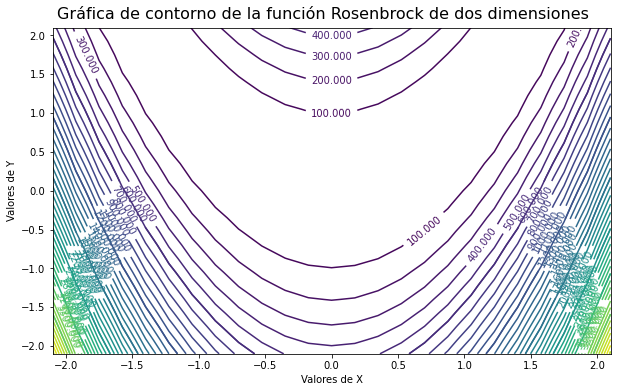

In [6]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

x = y = np.linspace(-2.1, 2.1, 25)
X,Y = np.meshgrid(x,y)
Z = f_rosen([X,Y])
cs = ax.contour(X, Y, Z, 50) #numero de niveles del contorno
ax.clabel(cs, fontsize=10) #valores de Z

#plt.title('Gráfica de contorno de la función Ackley de dos dimensiones')
plt.figtext(.5,.9,'Gráfica de contorno de la función Rosenbrock de dos dimensiones', fontsize=16, ha='center')
plt.xlabel('Valores de X')
plt.ylabel('Valores de Y')

cs = ax.contour(X,Y,Z)
plt.show()

Text(0.5, 0.9, 'Gráfica de superficie de la función Rosenbrock de dos dimensiones')

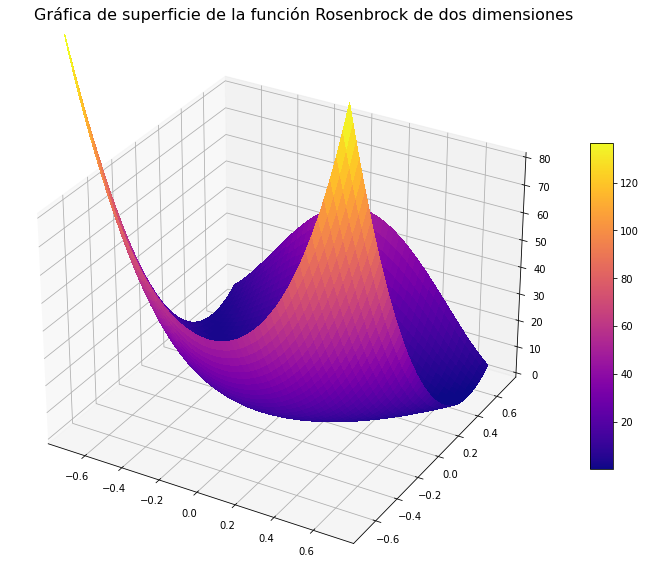

In [7]:
from matplotlib import cm

fig = plt.figure(figsize=(14,10))
ax = plt.axes(projection='3d')


x = y = np.linspace(-0.7, 0.7, 50)
X,Y = np.meshgrid(x,y)
Z = f_rosen([X,Y])
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap=cm.plasma,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, 80)
fig.colorbar(surf, shrink=0.6, aspect=14)
plt.figtext(.5,.9,'Gráfica de superficie de la función Rosenbrock de dos dimensiones', fontsize=16, ha='center')

### Optimización con nuestra implementacion del algoritmo BFGS dela función Rosenbrock - Dimensión 2

In [8]:
X0 = [-1.5,1.5]
var_sensibilidad  = np.around(np.linspace(0.01, 1.3, num=25, endpoint=True), decimals=3).tolist()

In [9]:
Rosenbrock2_min, Rosenbrock2_max, Rosenbrock2_prom, Rosenbrock2_med, datos_Rosenbrock2 = evaluador(fN_rosen, X0, var_sensibilidad)

In [10]:
print (f"El minimo de los minimo valor de la función en las 25 optimizaciones es: {Rosenbrock2_min}")
print ("El máximo de los minimo valor de la función en las 25 optimizaciones es: {}".format(Rosenbrock2_max))
print ("El promedio de los minimos de la función en las 25 optimizaciones es: " + str(Rosenbrock2_prom))
print ((f"La mediana del minimo del valor de la función en las 25 optimizaciones es: {Rosenbrock2_med}"))
datos_Rosenbrock2

El minimo de los minimo valor de la función en las 25 optimizaciones es: 0.40948279526195197
El máximo de los minimo valor de la función en las 25 optimizaciones es: 5.02960777412327e+16
El promedio de los minimos de la función en las 25 optimizaciones es: 2011859845410206.8
La mediana del minimo del valor de la función en las 25 optimizaciones es: 55758.58167834801


,Paso,Iteraciones para convergencia,gradiente en el minimo,F(X) en el minimo,Coordenadas
0,0.010,1000,2.472804e+04,2.092563e+03,"[-40.48987830412865, 1637.5037118149976]"
1,0.064,1000,9.543235e+05,5.575858e+04,"[-130.0243379481161, 16886.68381465376]"
2,0.118,646,9.908634e-03,4.099166e-01,"[0.36172775723500683, 0.12582189722419704]"
3,0.171,1000,1.959364e+09,2.543131e+08,"[-3201.088383866571, 10245404.600355735]"
4,0.225,1000,2.671033e+10,4.572828e+09,"[-10141.583879617347, 102845037.81463072]"
5,0.279,483,8.111661e-03,4.102666e-01,"[0.36145291407498076, 0.12562401039792773]"
6,0.332,469,7.813548e-03,4.105172e-01,"[0.3612591252673358, 0.12548094281949607]"
7,0.386,1000,3.286859e+11,2.527292e+10,"[-57724.32440002838, 3332082815.0433636]"
8,0.440,434,9.017270e-03,4.104221e-01,"[0.3613361961207009, 0.1255332923223493]"
9,0.494,363,8.017076e-03,4.105486e-01,"[0.3612355373976179, 0.12546259462880238]"


<AxesSubplot:>

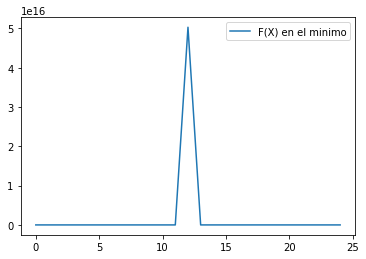

In [11]:
datos_Rosenbrock2[['F(X) en el minimo']].plot()

### Optimización con nuestra implementacion del algoritmo BFGS dela función Rosenbrock - Dimensión 5

In [12]:
X0_5 = [-1.51,1.51, 1.51, 1.51, 1.51]
var_sensibilidad  = np.around(np.linspace(0.01, 1.3, num=25, endpoint=True), decimals=3).tolist()

In [13]:
Rosenbrock5_min, Rosenbrock5_max, Rosenbrock5_prom, Rosenbrock5_med, datos_Rosenbrock5 = evaluador(fN_rosen, X0_5, var_sensibilidad)

In [14]:
print (f"El minimo de los minimo valor de la función en las 25 optimizaciones es: {Rosenbrock5_min}")
print ("El máximo de los minimo valor de la función en las 25 optimizaciones es: {}".format(Rosenbrock5_max))
print ("El promedio de los minimos de la función en las 25 optimizaciones es: " + str(Rosenbrock5_prom))
print ((f"La mediana del minimo del valor de la función en las 25 optimizaciones es: {Rosenbrock5_med}"))
datos_Rosenbrock5

El minimo de los minimo valor de la función en las 25 optimizaciones es: 4.4329276336496914e+58
El máximo de los minimo valor de la función en las 25 optimizaciones es: 3.031090046839778e+123
El promedio de los minimos de la función en las 25 optimizaciones es: 1.2472702195652991e+122
La mediana del minimo del valor de la función en las 25 optimizaciones es: 4.260464478363166e+106


,Paso,Iteraciones para convergencia,gradiente en el minimo,F(X) en el minimo,Coordenadas
0,0.010,22,0.0,4.121347e+79,"[-1.38488688692066e+18, 5265716908349774.0, 2.5235145239287538e+19, -9.013625237664797e+18, -5.947052833921869e+22]"
1,0.064,6,0.0,1.872323e+76,"[-5.902958439511526e+17, -5.902957366479997e+17, 3.246626714487068e+18, 2.951479301562242e+18, 9.444733323309828e+18]"
2,0.118,5,0.0,9.167034e+72,"[-4.076339239312741e+17, 4.3854666587750374e+17, -3.865510318626318e+16, 4.0561862316658797e+17, 1.2041571461709445e+18]"
3,0.171,5,0.0,5.824495e+87,"[-8.655041068683383e+20, 4.271305046207226e+20, 6.760654733280952e+20, 2.7530027992648117e+21, 1.8451332679484496e+21]"
4,0.225,5,0.0,1.054600e+94,"[-3.28932549924407e+22, 5.328378408282796e+21, -7.353534556995247e+20, 1.0105530431873229e+23, 6.038991196661865e+22]"
5,0.279,5,0.0,1.712612e+102,"[-4.7300473044510616e+23, 1.1428426543574123e+25, -1.2545541317310936e+24, 2.838364140725059e+24, 2.3694255050762884e+24]"
6,0.332,5,0.0,4.260464e+106,"[-4.151264420440411e+24, -8.040247344289303e+17, 1.2255601004555574e+26, 1.1898702623709774e+26, -1.0959577252753534e+25]"
7,0.386,5,0.0,4.294257e+110,"[6.02765490777263e+25, -3.703664358829493e+25, 1.435982175124091e+27, 4.53275908268456e+26, 7.430230555185226e+25]"
8,0.440,5,0.0,6.213488e+112,"[-8.793054404105802e+24, 4.2775039898301946e+27, 4.114400654776367e+27, -2.1095843804720368e+17, -3.2180917123489484e+26]"
9,0.494,5,0.0,2.415531e+113,"[-1.7640969466933724e+27, 2.2897379922314663e+26, 6.996755499548145e+27, 1.7459415490198263e+27, -5.818125512088785e+26]"


<AxesSubplot:>

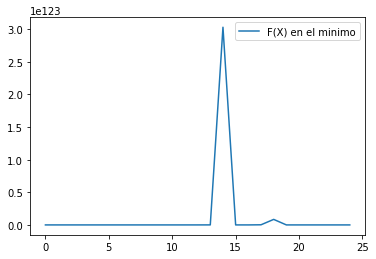

In [15]:
datos_Rosenbrock5[['F(X) en el minimo']].plot()

### Optimización con nuestra implementacion del algoritmo BFGS dela función Rosenbrock - Dimensión 10

In [16]:
X0_10 = [-1.5,1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5]
var_sensibilidad  = np.around(np.linspace(0.01, 1.3, num=25, endpoint=True), decimals=3).tolist()

In [17]:
Rosenbrock10_min, Rosenbrock10_max, Rosenbrock10_prom, Rosenbrock10_med, datos_Rosenbrock10 = evaluador(fN_rosen, X0_10, var_sensibilidad)

In [18]:
print (f"El minimo de los minimo valor de la función en las 25 optimizaciones es: {Rosenbrock10_min}")
print ("El máximo de los minimo valor de la función en las 25 optimizaciones es: {}".format(Rosenbrock10_max))
print ("El promedio de los minimos de la función en las 25 optimizaciones es: " + str(Rosenbrock10_prom))
print ((f"La mediana del minimo del valor de la función en las 25 optimizaciones es: {Rosenbrock10_med}"))
datos_Rosenbrock10

El minimo de los minimo valor de la función en las 25 optimizaciones es: 6.817990398468592e+61
El máximo de los minimo valor de la función en las 25 optimizaciones es: 3.2992190734893814e+121
El promedio de los minimos de la función en las 25 optimizaciones es: 1.3216435301011144e+120
La mediana del minimo del valor de la función en las 25 optimizaciones es: 2.644955046485901e+103


,Paso,Iteraciones para convergencia,gradiente en el minimo,F(X) en el minimo,Coordenadas
0,0.010,10,0.0,4.387428e+70,"[90044319720711.67, 15492909129.86626, -1440529396.6546605, -9.223368533211446e+16, 1.3835052969503912e+17, -52196352541.0984, 5260092529.076, -720578226420706.1, -90557929258912.6, -9.512240676593613e+16]"
1,0.064,6,0.0,7.603702e+75,"[3.873815981396038e+17, -2.951479314857405e+17, 2.361183249975643e+18, 29460543178.47483, -1.7708874016161367e+18, -1.1805915912574415e+18, -5.902957809004086e+17, -2.3611831461424696e+18, 1.180591496370138e+18, -2.9514789044460744e+18]"
2,0.118,5,0.0,4.123268e+74,"[-1.957511880099749e+17, 1.3798563165213478e+18, -2.1101084657049293e+17, -2.168478667655069e+17, -2.1700184273009814e+17, -2.1674481165466698e+17, -2.1669314661243706e+17, -2.2925580797698784e+17, 8.336492477636134e+17, 5.4108276941528435e+17]"
3,0.171,5,0.0,9.496562e+85,"[-6.604606601239319e+20, 2.665936697610957e+20, 6.477298698923076e+20, 6.484945235510398e+20, 3.624103873663153e+20, 7.823046840304611e+20, 7.11440427877126e+19, -1.3549035638188399e+20, 3.104216015249646e+20, 1.441160746399679e+21]"
4,0.225,5,0.0,6.720486e+91,"[-2.7436690165727594e+21, 2.5127828474010366e+22, -6.772195637238606e+21, 1.1868128793244037e+22, 5.278727329744427e+21, -6.770620817356554e+21, -1.0046318531110356e+22, 2.197522049058406e+22, -8.453408614800456e+21, -5.177250663292392e+21]"
5,0.279,5,0.0,4.079285e+96,"[-2.1366885053660788e+22, -1.88480149173918e+23, 2.887820657777636e+23, -3.2660091058019895e+23, -1.863956844728209e+23, 2.941670194561686e+23, 2.8875581861496835e+23, 2.7294541912993818e+23, -2.0663585477484876e+22, -4.243287484466854e+22]"
6,0.332,5,0.0,2.644955e+103,"[-1.3806846322927246e+24, 4.876000767672541e+24, 1.8886137289126532e+25, 2.8498101292289674e+24, -1.2733499702992605e+25, 7.352548128351121e+24, 5.456930639107841e+24, 7.330635679680511e+24, 1.7942825239033178e+25, -4.3791009518528764e+24]"
7,0.386,5,0.0,2.620656e+107,"[1.2237520110486952e+26, 2.5271398199828187e+25, 1.0595256615438652e+26, 1.8545350640559456e+26, 8.609550580037053e+25, 6.3091292321602935e+25, -6.24479068740338e+25, 1.7672594355787624e+26, 7.115737845566018e+25, 2.08335102591025e+25]"
8,0.440,5,0.0,5.529939e+109,"[-1.405284946540143e+26, -2.7747144696301815e+26, -1.3184967640517327e+26, 6.876354596217775e+26, 2.294124397756872e+26, 4.7040345513310495e+26, 3.499088565099441e+26, 7.112318144799782e+26, -1.1647391086710638e+26, -7.09222538945134e+24]"
9,0.494,5,0.0,4.782144e+108,"[5.569068361261497e+25, 4.275039184411864e+26, 2.332895699518456e+26, 1.9464825841125192e+26, 5.0912097504341435e+25, 5.092142890051158e+25, 1.2277434583519033e+26, -3.128621759744128e+26, 1.1765140933777775e+26, 1.157864970074836e+25]"


<AxesSubplot:>

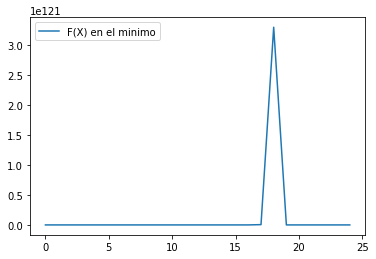

In [19]:
datos_Rosenbrock10[['F(X) en el minimo']].plot()

### Caso con puntos de inicio aleatorios

In [20]:
#generación de puntos aleatorios para 2, 5, y 10 dimensiones
np.random.seed(seed=1)

In [21]:
X0_2_a = np.random.uniform(low=--2, high=2, size=2)
X0_2_a

array([2., 2.])

In [22]:
X0_5_a = np.random.uniform(low=-2, high=2, size=5)
X0_5_a

array([-1.9995425 , -0.79066971, -1.41297644, -1.63064562, -1.25495915])

In [23]:
X0_10_a = np.random.uniform(low=-2, high=2, size=10)
X0_10_a

array([-0.61775709, -0.4129301 ,  0.15526694, -0.32322194,  0.740878  ,
       -1.182191  ,  1.51246975, -1.89044963,  0.68187004, -0.33078079])

In [24]:
var_sensibilidad  = np.around(np.linspace(0.01, 2, num=25, endpoint=True), decimals=3).tolist()

In [25]:
Rosenbrock2a_min, Rosenbrock2a_max, Rosenbrock2a_prom, Rosenbrock2a_med, datos_Rosenbrock2a = evaluador(fN_rosen, X0_2_a, var_sensibilidad)
print (f"El minimo de los minimo valor de la función en las 25 optimizaciones es: {Rosenbrock2_min}")
print ("El máximo de los minimo valor de la función en las 25 optimizaciones es: {}".format(Rosenbrock2_max))
print ("El promedio de los minimos de la función en las 25 optimizaciones es: " + str(Rosenbrock2_prom))
print ((f"La mediana del minimo del valor de la función en las 25 optimizaciones es: {Rosenbrock2_med}"))
datos_Rosenbrock2a

El minimo de los minimo valor de la función en las 25 optimizaciones es: 0.40948279526195197
El máximo de los minimo valor de la función en las 25 optimizaciones es: 5.02960777412327e+16
El promedio de los minimos de la función en las 25 optimizaciones es: 2011859845410206.8
La mediana del minimo del valor de la función en las 25 optimizaciones es: 55758.58167834801


,Paso,Iteraciones para convergencia,gradiente en el minimo,F(X) en el minimo,Coordenadas
0,0.010,1000,1.869961e+03,8.163239e+01,"[8.965105545024466, 79.94662609865617]"
1,0.093,1000,1.808594e+09,1.731668e+08,"[-3687.020874616, 13592859.73825677]"
2,0.176,1000,7.969591e+10,1.500891e+10,"[-16643.45612168051, 276992494.1830518]"
3,0.259,1000,4.904076e+11,1.300861e+11,"[-34479.938560558854, 1188830260.8847983]"
4,0.342,1000,2.045656e+12,8.367359e+11,"[-56362.960398853655, 3176692005.468699]"
5,0.425,1000,1.283331e+12,2.149716e+11,"[-71130.43114803742, 5059492419.163041]"
6,0.507,1000,6.013893e+14,1.647195e+16,"[-117155.60307298636, 13712601027.378044]"
7,0.590,1000,1.571744e+13,5.267348e+12,"[-173005.0509349137, 29930518794.960167]"
8,0.673,1000,1.182059e+12,2.720020e+11,"[-57652.838892079184, 3323797998.152467]"
9,0.756,1000,2.766832e+12,6.907971e+11,"[-84521.52397406883, 7143805331.586612]"


<AxesSubplot:>

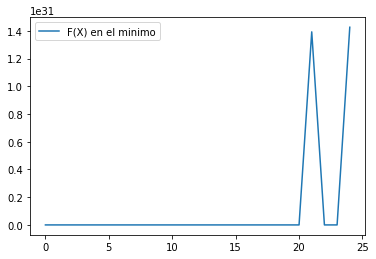

In [26]:
datos_Rosenbrock2a[['F(X) en el minimo']].plot()

In [27]:
Rosenbrock5a_min, Rosenbrock5a_max, Rosenbrock5a_prom, Rosenbrock5a_med, datos_Rosenbrock5a = evaluador(fN_rosen, X0_5_a, var_sensibilidad)
print (f"El minimo de los minimo valor de la función en las 25 optimizaciones es: {Rosenbrock5_min}")
print ("El máximo de los minimo valor de la función en las 25 optimizaciones es: {}".format(Rosenbrock5_max))
print ("El promedio de los minimos de la función en las 25 optimizaciones es: " + str(Rosenbrock5_prom))
print ((f"La mediana del minimo del valor de la función en las 25 optimizaciones es: {Rosenbrock5_med}"))
datos_Rosenbrock5a

El minimo de los minimo valor de la función en las 25 optimizaciones es: 4.4329276336496914e+58
El máximo de los minimo valor de la función en las 25 optimizaciones es: 3.031090046839778e+123
El promedio de los minimos de la función en las 25 optimizaciones es: 1.2472702195652991e+122
La mediana del minimo del valor de la función en las 25 optimizaciones es: 4.260464478363166e+106


/media/user/disco_1Tb_1/Unal/Maestria/CEOH/03_Tarea_1/optimizador_BFGS.py:120: RuntimeWarning: divide by zero encountered in double_scalars
  ro = 1.0 / (np.dot(yk, sk))
/media/user/disco_1Tb_1/Unal/Maestria/CEOH/03_Tarea_1/optimizador_BFGS.py:122: RuntimeWarning: invalid value encountered in multiply
  A1 = I - ro * sk[:, np.newaxis] * yk[np.newaxis, :]
/media/user/disco_1Tb_1/Unal/Maestria/CEOH/03_Tarea_1/optimizador_BFGS.py:123: RuntimeWarning: invalid value encountered in multiply
  A2 = I - ro * yk[:, np.newaxis] * sk[np.newaxis, :]


,Paso,Iteraciones para convergencia,gradiente en el minimo,F(X) en el minimo,Coordenadas
0,0.010,7,0.0,2.048857e+70,"[3.566230291636681e+16, 1.184096178189049e+17, 4.301549858085878e+16, -4.2493834778369704e+16, 4.49396489967581e+20]"
1,0.093,5,0.0,8.983335e+102,"[-1.7411701946707454e+24, 8.687030570229931e+24, 5.400213121394901e+24, -1.6987663632682218e+25, -1.250513708992133e+25]"
2,0.176,4,0.0,5.306104e+59,"[-2065100311.4789193, -247697800708616.78, -3773572406.160799, 198154802207743.88, -43344205282819.68]"
3,0.259,4,0.0,5.007928e+70,"[3.7325823571523816e+16, 3.732582520393551e+16, -29863511045.73814, -1.4930335783487978e+17, -1.8662906184495736e+16]"
4,0.342,4,0.0,2.702875e+78,"[-18295665465.97194, -1.261757299531347e+19, 3.154393127227834e+18, -6.308786542980419e+18, 3.942991728536011e+17]"
5,0.425,4,0.0,2.495136e+82,"[-3.135946493517878e+19, -140641770756.11255, -3.135946518468487e+19, 1.2543785956343985e+20, -1.95996653954214e+18]"
6,0.507,4,0.0,2.652445e+85,"[-1.496399879002955e+20, 5.985599514187581e+20, -2.992799763204256e+20, 5.985599514982608e+20, 9.352499253740243e+18]"
7,0.590,4,0.0,1.705817e+90,"[-2.2637844326395247e+21, 1.1144784899097603e+22, -2.786196225608326e+21, 6.268941505758764e+21, 1.3060294803246744e+20]"
8,0.673,4,0.0,1.029962e+88,"[9.9317270108513e+20, -689800981301.1786, -960877787213.5629, 3.178152642717241e+21, 1.9863454015519687e+20]"
9,0.756,4,0.0,6.725729e+91,"[-5.355163591355766e+21, 2.8560872487488047e+22, -1167248881421.5222, 8.925272652414656e+21, -50519374665.79298]"


<AxesSubplot:>

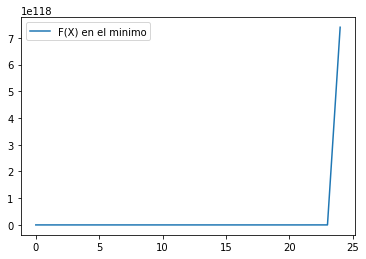

In [28]:
datos_Rosenbrock5a[['F(X) en el minimo']].plot()

In [29]:
Rosenbrock10a_min, Rosenbrock10a_max, Rosenbrock10a_prom, Rosenbrock10a_med, datos_Rosenbrock10a = evaluador(fN_rosen, X0_10_a, var_sensibilidad)
print (f"El minimo de los minimo valor de la función en las 25 optimizaciones es: {Rosenbrock10_min}")
print ("El máximo de los minimo valor de la función en las 25 optimizaciones es: {}".format(Rosenbrock10_max))
print ("El promedio de los minimos de la función en las 25 optimizaciones es: " + str(Rosenbrock10_prom))
print ((f"La mediana del minimo del valor de la función en las 25 optimizaciones es: {Rosenbrock10_med}"))
datos_Rosenbrock10a

El minimo de los minimo valor de la función en las 25 optimizaciones es: 6.817990398468592e+61
El máximo de los minimo valor de la función en las 25 optimizaciones es: 3.2992190734893814e+121
El promedio de los minimos de la función en las 25 optimizaciones es: 1.3216435301011144e+120
La mediana del minimo del valor de la función en las 25 optimizaciones es: 2.644955046485901e+103


/media/user/disco_1Tb_1/Unal/Maestria/CEOH/03_Tarea_1/optimizador_BFGS.py:120: RuntimeWarning: divide by zero encountered in double_scalars
  ro = 1.0 / (np.dot(yk, sk))
/media/user/disco_1Tb_1/Unal/Maestria/CEOH/03_Tarea_1/optimizador_BFGS.py:122: RuntimeWarning: invalid value encountered in multiply
  A1 = I - ro * sk[:, np.newaxis] * yk[np.newaxis, :]
/media/user/disco_1Tb_1/Unal/Maestria/CEOH/03_Tarea_1/optimizador_BFGS.py:123: RuntimeWarning: invalid value encountered in multiply
  A2 = I - ro * yk[:, np.newaxis] * sk[np.newaxis, :]


,Paso,Iteraciones para convergencia,gradiente en el minimo,F(X) en el minimo,Coordenadas
0,0.010,7,0.0,2.182362e+114,"[4.085202129641695e+27, -4.1966167331774085e+27, 3.2325709275839587e+27, 3.343985531119642e+27, -3.0708650099523023e+27, -8.170404259283545e+27, -2.550930193452446e+27, 8.475246993957558e+27, -1.0299661126854353e+28, -4.30431751659528e+28]"
1,0.093,5,0.0,1.712175e+101,"[6.240598314864913e+23, 1.1314715061454623e+24, -4.635003287728958e+23, -2.266141565857403e+23, 4.3235800943514554e+24, -2.3838801686297166e+24, 3.7737312126043763e+24, 5.183675532781401e+24, 4.48263222456614e+24, 4.996405779841269e+23]"
2,0.176,4,0.0,4.074906e+58,"[-12517344391490.654, -8145231465545.327, -241479535973.72757, -184995628172.8073, 142038197976839.75, -11851903890193.09, 2810546445875.4805, -14223563495789.006, -24768834690320.582, 2196007981948.3237]"
3,0.259,4,0.0,1.722119e+66,"[-343507059791423.9, -209378877225967.03, -1450669784796.591, -836580108783.3467, 1.1452593896578902e+16, -1076300212514752.1, 2547041716555.3154, -693420952529302.5, -2004804164217769.2, -995823507265.9655]"
4,0.342,4,0.0,2.547790e+70,"[-4524427978563740.0, -2647271426596972.0, 11656920741847.951, 7896636319784.439, 1.2629895301704253e+17, -1.2706905617755668e+16, -107499506038629.88, -2695392343624016.0, -2.3488523453133176e+16, -318875110993292.06]"
5,0.425,4,0.0,2.127981e+71,"[-1.2441193888172616e+16, -6699104245029709.0, 164486882740900.3, 164486908031873.22, 2.1437135654133283e+17, -3.253850803545322e+16, -3588726467223435.5, 4.4979729744075896e+16, -5.742089708322955e+16, -1555148777229173.5]"
6,0.507,4,0.0,5.918070e+77,"[3.1966550061369926e+17, 2.0093260041641453e+17, -5208835172624187.0, -2961187118974316.5, -8.767968015693626e+18, 9.224633016964005e+17, 3.1966664135369436e+16, 8.585302531589537e+17, 1.607460802839965e+18, 5.080398140338935e+16]"
7,0.590,4,0.0,2.424732e+79,"[-1.0023999481401577e+18, -6.235937385495983e+17, 1.7499651223651282e+16, 8002509552542624.0, 2.217502654943901e+19, -2.7361732177672084e+18, -5.321719291060168e+17, -1.372404362939132e+18, -4.974135725087035e+18, -1.512899859157757e+17]"
8,0.673,4,0.0,6.229074e+76,"[-3.1748914018094144e+17, -1.848862776591812e+17, 6393352385634463.0, 1846968501837433.8, 4.970713039891167e+18, -6.721070828432411e+17, 4.728240760393653e+17, -1.4775746588057943e+18, -1.6488218792565468e+18, -5.5314337684123944e+16]"
9,0.756,4,0.0,7.333968e+80,"[9.226794732456626e+17, 1.0252467042379607e+18, 1.2608108796641948e+16, -5426274510340468.0, -5.2037760552316125e+19, 2.834430487764247e+18, 2.9033762579796726e+18, -2.0853831332660012e+16, 5.55650517535623e+18, 2.851453960663824e+16]"


<AxesSubplot:>

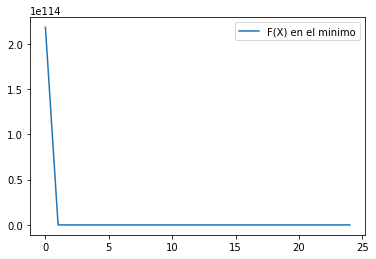

In [30]:
datos_Rosenbrock10a[['F(X) en el minimo']].plot()